In [1]:
#Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import rand
import math
from sklearn.preprocessing import  StandardScaler

In [2]:
#1. Definir funciones 
def addOnes(X):
    X1=np.array(X)
    m , n = np.shape(X1)
    ones = np.ones((m, 1))
    X1 = np.concatenate((ones, X1), axis=1)
    return X1

def mse(Y, Yt):
    residual = Y - Yt
    cost = np.dot(residual.T,residual) / len(Y)
    return cost

def gradient(X, Y, W):
    residual = Y - np.dot(X,W.T)
    grad = -2 * np.dot(X.T, residual)
    return grad

def GD(X, Y, W, alpha, epsilon, iterations):
    grad = gradient(X, Y, W)
    gradNorm = np.linalg.norm(grad)
    Yt = np.dot(X,W.T)
    cost = mse(Y,Yt)
    it = 0
    J = [] #Lista donde guardaremos el valor del error (MSE) en cada iteración
    
    while gradNorm > epsilon and it < iterations:
        
        #calcular gradiente
        grad = gradient(X, Y, W)
        gradNorm = np.linalg.norm(grad)
        
        #Actualizar W
        W = W - alpha * grad.T
        
        #Incrementar contador de iteraciones
        it += 1
        
        #Calcular la predicción y el error (MSE)
        Yt = np.dot(X, W.T)
        cost  = mse(Y,Yt)

        #Guardar el vector del error
        J.append(float(cost))
        
    return W, it, J


def loadCsv(filename):
    data = pd.read_csv(filename)
    dataset = np.array(data)
    m, n = np.shape(dataset)
    x = dataset[:, 0:n-1]
    y = dataset[:, -1]
    y = np.reshape(y ,(m,1))
    
    return x, y


In [3]:
#2. Leer dataset
filename = 'bike-day.csv'
x, y = loadCsv(filename)
print('X size:',np.shape(x), 'Y size:',  np.shape(y))

X size: (731, 11) Y size: (731, 1)


In [4]:
#3. Escalar x -> StandarScaler 
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


In [5]:
#4. Definir el array de prueba
testsize = np.arange(0.1,1,0.1)
print(testsize)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [6]:
#5. Inicializar variables 
#Learning rate o índice de aprendizaje pasito tun 
alpha = 0.0001

#Precisión (qué tan cercano a cero debe estar el error) margen de error permitido
epsilon = 0.01

#Número máximo de iteraciones (es útil para que el algoritmo no se cicle)
itera = 100000


#lista de costos para cada prueba 
costosTraining = [] 
costosTesting = []


In [7]:
#6. Para cada tamaño de testsize
for tsize in testsize:
    #split dataset
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = tsize , random_state = 0)

    #añadir 1s a xTrain y xTest
    xTr = addOnes(xTrain)
    xTe = addOnes(xTest)

    #inicializar w de forma aleatoria
    m,n = np.shape(xTr)
    init_w = np.random.rand(1,n)

    print("Testsize: ", tsize)

    #GD
    w, iterations, J = GD(xTr, yTrain, init_w, alpha, epsilon, itera)

    #calcular costos
    cTr = mse(yTrain, np.dot(xTr, w.T)) #testing
    cTe = mse(yTest, np.dot(xTe, w.T))

    print("Training cost:", cTr)
    print("Training cost:", cTe)


    #Guardar en listas de costos 
    costosTraining.append(cTr)
    costosTesting.append(cTe)

Testsize:  0.1
Training cost: [[736048.03528628]]
Training cost: [[876272.98543307]]
Testsize:  0.2
Training cost: [[733745.88857631]]
Training cost: [[831250.9068291]]
Testsize:  0.30000000000000004
Training cost: [[746827.55171944]]
Training cost: [[780473.83514223]]
Testsize:  0.4
Training cost: [[715532.3331936]]
Training cost: [[834805.55354497]]
Testsize:  0.5
Training cost: [[742452.69246831]]
Training cost: [[791084.75033114]]
Testsize:  0.6
Training cost: [[732512.56381877]]
Training cost: [[812011.66268815]]
Testsize:  0.7000000000000001
Training cost: [[626687.99437567]]
Training cost: [[849850.13963363]]
Testsize:  0.8
Training cost: [[678242.3690894]]
Training cost: [[851912.56133463]]
Testsize:  0.9
Training cost: [[716465.5681263]]
Training cost: [[909703.78037849]]


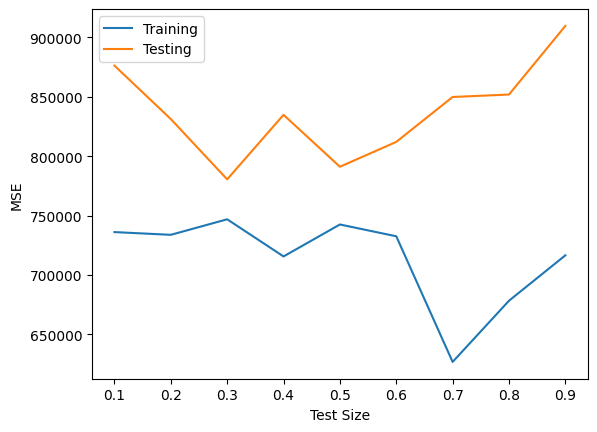

In [8]:
#7. Graficar
costosTraining = np.array(costosTraining)
costosTesting = np.array(costosTesting)

costosTraining = costosTraining.reshape(-1,1)
costosTesting = costosTesting.reshape(-1,1)

plt.plot(testsize,costosTraining, label = 'Training')
plt.plot(testsize,costosTesting, label = 'Testing')

plt.xlabel('Test Size')
plt.ylabel('MSE')

plt.legend()


In [9]:
#2.Add Polynomial features

#2.1. Inicializar variables 
#Learning rate o índice de aprendizaje pasito tun 
alpha = 0.0000000001
#Precisión (qué tan cercano a cero debe estar el error) margen de error permitido
epsilon = 0.01
#Número máximo de iteraciones (es útil para que el algoritmo no se cicle)
itera = 1000000

#lista de costos para cada prueba 
costosTraining = [] 
costosTesting = []

#nuevas variables

#Random 
seed = 1

#elegir el testsize con menor error
testsize = 0.3

#variable para formar matrices polinomiales
xtemp = x

#Grados que voy a evaluar del 1-5
poly = range(1,5)


In [10]:
#1.2 Leer dataset de nuevo
filename = 'bike-day.csv'
x, y = loadCsv(filename)
print('X size:',np.shape(x), 'Y size:',  np.shape(y))

X size: (731, 11) Y size: (731, 1)


Grade: 1
W:  (1, 12)
Iteraciones: 1000000
Training cost: [[7453393.45058068]]
Testing cost: [[6873160.20411965]]
Grade: 2
W:  (1, 23)
Iteraciones: 1000000
Training cost: [[6993084.46378685]]
Testing cost: [[6720333.9758163]]
Grade: 3
W:  (1, 34)
Iteraciones: 1000000
Training cost: [[2981635.07170709]]
Testing cost: [[3962374.09524619]]
Grade: 4
W:  (1, 45)
Iteraciones: 1000000
Training cost: [[3384353.70914489]]
Testing cost: [[4257616.33565077]]


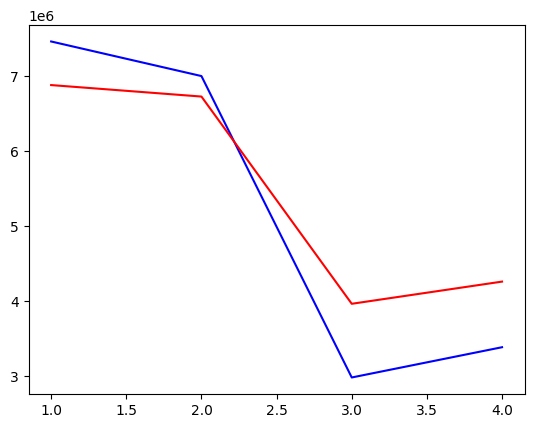

In [11]:
#Para cada grado polinomial realizar el gradiente descendente, obtener W's y calcular el MSE (error o costo)
for grade in poly:
    print('Grade:', grade)

    if grade == 1:
        xtemp = x
    else:
        xtemp = np.concatenate((xtemp, x**(grade)),axis =1)
    # Añadir unos a la matriz polinomial
    x_1s = addOnes(xtemp)
    
    # Split dataset en Training and Testing
    xTrain, xTest, yTrain, yTest = train_test_split(x_1s, y, test_size = tsize , random_state = seed)
    yTrain = yTrain.reshape(-1,1)
    yTest = yTest.reshape(-1,1)
    
    # Incializar W de forma aleatoria
    m,n = np.shape(xTrain)
    init_w = np.random.rand(1,n)

    print('W: ',init_w.shape)

    # Obtener W y el error MSE (J) a través del GD
    w, it, J = GD(xTrain, yTrain, init_w, alpha, epsilon, itera)
    
    #Imprimir la iteración it
    print('Iteraciones:', it)
    
    #Calcular errores MSE de Training y Testing  
    cTr = mse(yTrain, np.dot(xTrain, w.T)) #testing
    cTe = mse(yTest, np.dot(xTest, w.T))
    
    print("Training cost:", cTr)
    print("Testing cost:", cTe)

    #Guardar en listas de costos 
    costosTraining.append(cTr)
    costosTesting.append(cTe)

#Convertir a arrays las listas
costosTraining = np.array(costosTraining)
costosTesting = np.array(costosTesting)

#Adecuar dimensiones
costosTraining = costosTraining.reshape(len(costosTraining), 1)
costosTest = costosTesting.reshape(len(costosTesting), 1)


##Graficar los errores con respecto al grado
plt.plot(poly, costosTraining, 'b')
plt.plot(poly, costosTest, 'r')















    


(658,)
(658,)
          Y        Ypred
0    3830.0  2259.469207
1    2114.0  1572.800283
2    3915.0  5625.476213
3    4322.0   685.753041
4    6591.0  2931.828817
..      ...          ...
653  7359.0  6499.766798
654  5062.0  2262.321190
655  5041.0  4663.703782
656  7691.0  5697.673224
657  3767.0  5622.927873

[658 rows x 2 columns]
          Y        Ypred
201    22.0  5088.852952
388   441.0  1044.558004
146   623.0  3014.401202
136   627.0  6950.104079
168   683.0   741.504419
..      ...          ...
65   8294.0  4942.965841
131  8362.0  3564.616843
306  8395.0  7607.257831
344  8555.0  7386.405264
408  8714.0  7604.666057

[658 rows x 2 columns]
[ 5.08885295e+03  1.04455800e+03  3.01440120e+03  6.95010408e+03
  7.41504419e+02  1.03607418e+03 -2.58742887e+02  4.25907826e+03
  3.29952885e+02  2.18885200e+02 -6.55940417e-01  2.23347194e+03
  2.34751615e+03  4.09585981e+02  2.65944541e+03  2.91710917e+02
  2.29158368e+03  2.22771400e+02  2.23786312e+03  7.23798721e+02
  7.55751647e

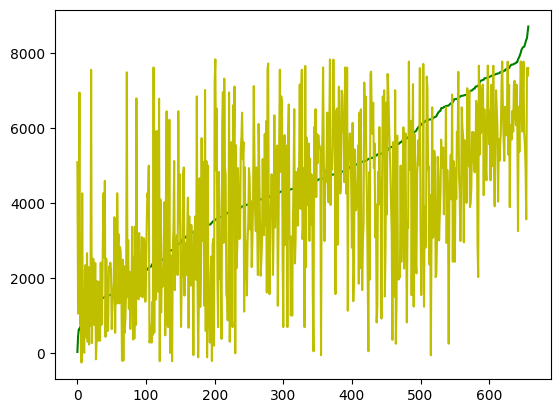

In [12]:
predTest = np.dot(xTest, w.T)
pT = predTest.reshape(len(predTest))
print(pT.shape)
yT = yTest.reshape(len(yTest))
print(yT.shape)
Ys = np.column_stack((yT,pT))
#print(Ys)
df_Ys = pd.DataFrame(data = Ys, columns = ['Y', 'Ypred'])
print(df_Ys)
df1 = df_Ys.sort_values(by=['Y'], ascending=True)
print(df1)
y1 = np.array(df1['Y'])
y2 = np.array(df1['Ypred'])
print(y2)
plt.plot(y1, 'g')
plt.plot(y2, 'y')
#plt.plot(y1,y2)


Conclusiones:
En esta actividad pudimos observar que el mejor tamaño para un dataset para el modelo de entrenamiento es de un 70% y el restante para las pruebas. También pudimos notar que el grado de polinimo puede reducir el costo, sin embargo, esto no quiere decir que entre mayor sea el el grado menor sera el costo. Debemos modificaar los datos y ver cual de todos se ajusta mejor a nuestro set de datos.